In [1]:
import matplotlib.pyplot as plt
import numpy as np

Carguemos los datos

In [2]:
expected = 'Expected_by_B_anomalies'
signals = ['Single', 'Pair', 'Total', 'Nonres']
linestyles = {'Continue': '-', 'Dashed': '--', 'Contour': ''}

Reconstruyamos la grafica del paper:

In [3]:
Data = {}

Data[expected] = np.loadtxt(f'Data_Right/{expected}.txt', delimiter = ';')

for signal in signals:
    for linestyle in linestyles:
        Data[f'{signal}_{linestyle}'] = np.loadtxt(f'Data_Right/{signal}_{linestyle}.txt', delimiter = ';')

In [4]:
colors = {'Single': 'green', 'Pair': 'red', 'Total': 'black', 'Nonres': 'orange'}

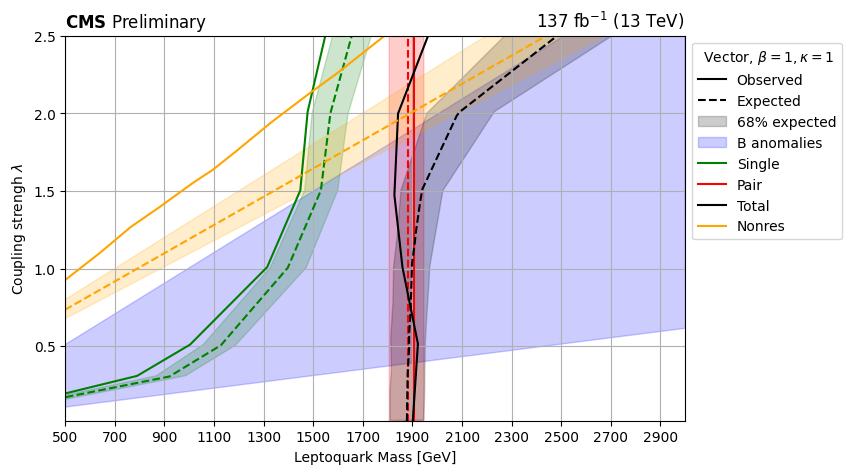

In [6]:
transp = 0.2

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(0,0, color = 'black', label = 'Observed', alpha = 1)
ax.plot(0,0, color = 'black', linestyle = '--', label = 'Expected', alpha = 1)
ax.fill(0,0, color = 'black', alpha = transp, label = '68% expected')
ax.fill(Data[expected][:,0], Data[expected][:,1], alpha = transp, c = 'blue', label = 'B anomalies')

for signal in signals:
    for key in linestyles:
        if linestyles[key] != '': 
            if key == 'Continue': ax.plot(Data[f'{signal}_{key}'][:,0], Data[f'{signal}_{key}'][:,1], linestyle = linestyles[key], color = colors[signal], label = signal)
            else: ax.plot(Data[f'{signal}_{key}'][:,0], Data[f'{signal}_{key}'][:,1], linestyle = linestyles[key], color = colors[signal])
        else: ax.fill(Data[f'{signal}_{key}'][:,0], Data[f'{signal}_{key}'][:,1], color = colors[signal], alpha = transp)



plt.legend(bbox_to_anchor=(1,1), title = r' Vector, $\beta = 1, \kappa = 1$')
plt.title(r'$\mathbf{CMS}$ Preliminary', loc = 'left')
plt.title(r'137 fb$^{-1}$ (13 TeV) ', loc = 'right')
plt.xlabel('Leptoquark Mass [GeV]')
plt.ylabel(r'Coupling strengh $\lambda$')
plt.xticks(np.arange(500,3000,200))
plt.xlim(500,3000)
plt.ylim(0.02,2.5)
plt.grid()
plt.show()

Ahora escalemosla para poder comparar con la nuestra

In [14]:
Data = {}

Data[expected] = np.loadtxt(f'Data_Right/{expected}.txt', delimiter = ';')
Data[expected][:,1] = Data[expected][:,1]*np.sqrt(2)
Data[expected][:,0] = Data[expected][:,0]/1000

for signal in signals:
    for linestyle in linestyles:
        Data[f'{signal}_{linestyle}'] = np.loadtxt(f'Data_Right/{signal}_{linestyle}.txt', delimiter = ';')
        Data[f'{signal}_{linestyle}'][:,1] = Data[f'{signal}_{linestyle}'][:,1]*np.sqrt(2)
        Data[f'{signal}_{linestyle}'][:,0] = Data[f'{signal}_{linestyle}'][:,0]/1000

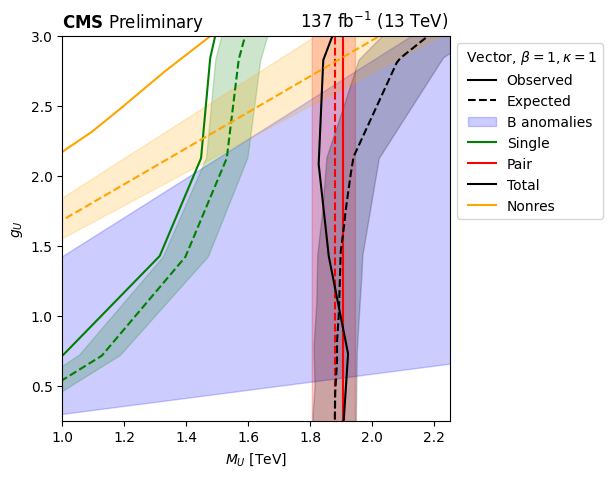

In [15]:
transp = 0.2

fig, ax = plt.subplots(figsize = (5,5))

ax.plot(0,0, color = 'black', label = 'Observed', alpha = 1)
ax.plot(0,0, color = 'black', linestyle = '--', label = 'Expected', alpha = 1)
ax.fill(Data[expected][:,0], Data[expected][:,1], alpha = transp, c = 'blue', label = 'B anomalies')

for signal in signals:
    for key in linestyles:
        if linestyles[key] != '': 
            if key == 'Continue': ax.plot(Data[f'{signal}_{key}'][:,0], Data[f'{signal}_{key}'][:,1], linestyle = linestyles[key], color = colors[signal], label = signal)
            else: ax.plot(Data[f'{signal}_{key}'][:,0], Data[f'{signal}_{key}'][:,1], linestyle = linestyles[key], color = colors[signal])
        else: ax.fill(Data[f'{signal}_{key}'][:,0], Data[f'{signal}_{key}'][:,1], color = colors[signal], alpha = transp)



plt.legend(bbox_to_anchor=(1,1), title = r' Vector, $\beta = 1, \kappa = 1$')
plt.title(r'$\mathbf{CMS}$ Preliminary', loc = 'left')
plt.title(r'137 fb$^{-1}$ (13 TeV) ', loc = 'right')
plt.xlabel(r'$M_U$ [TeV]')
plt.ylabel(r'$g_U$')
plt.xlim(1,2.250)
plt.ylim(0.25,3)
plt.show()